In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ROSHAN\\Downloads\\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv")

In [4]:
df.head(5)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [9]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-08-30,16436,10705,225,19026,3925,59.0
1,2023-09-15,15499,10671,267,18421,4519,61.0
2,2021-12-28,1756,2352,0,3775,0,13.0
3,2023-01-11,10536,8347,223,14072,0,48.0
4,2021-09-11,820,612,0,1283,0,11.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [5]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [10]:
print(df.isnull().sum())

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [12]:
df['Other'] = df['Other'].fillna(df['Other'].mean())

In [13]:
print(df.isnull().sum())

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


In [14]:
import matplotlib.pyplot as plt

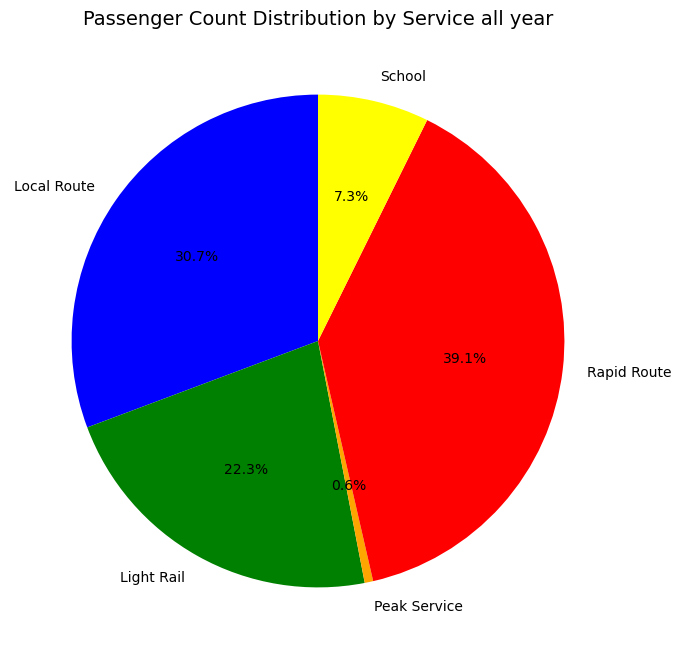

In [64]:
service = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum()

plt.figure(figsize=(8, 8))
service.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['blue', 'green', 'orange', 'red', 'yellow'] 
)

plt.title('Passenger Count Distribution by Service all year', fontsize=14)

plt.ylabel('')
plt.show()

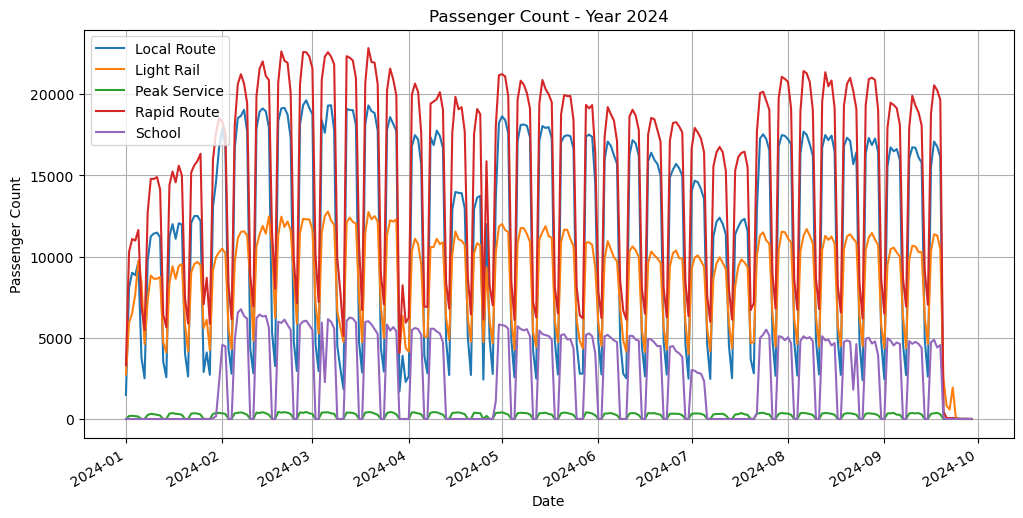

In [61]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df_2024 = df[df['Date'].dt.year == 2024]
df_2024.set_index('Date')[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].plot(figsize=(12, 6))
plt.title("Passenger Count - Year 2024")
plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()

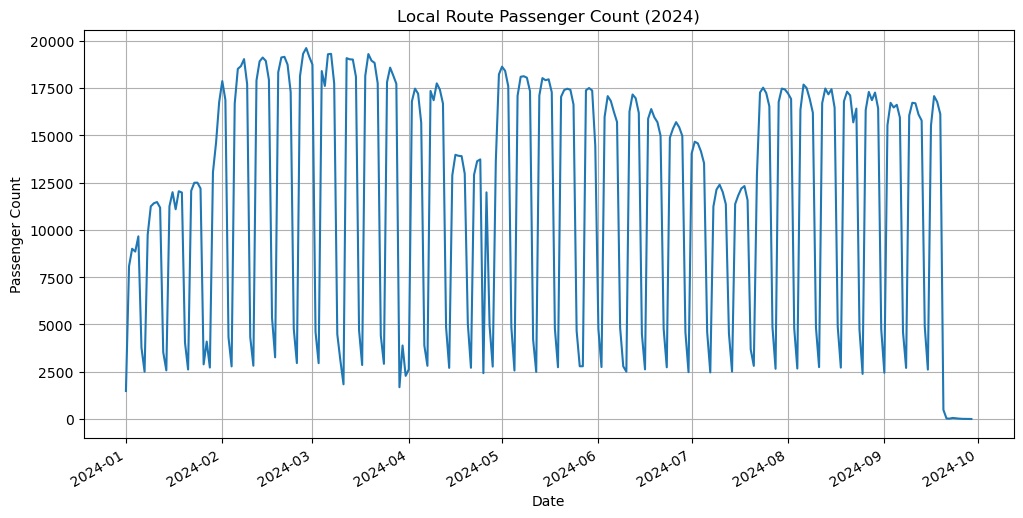

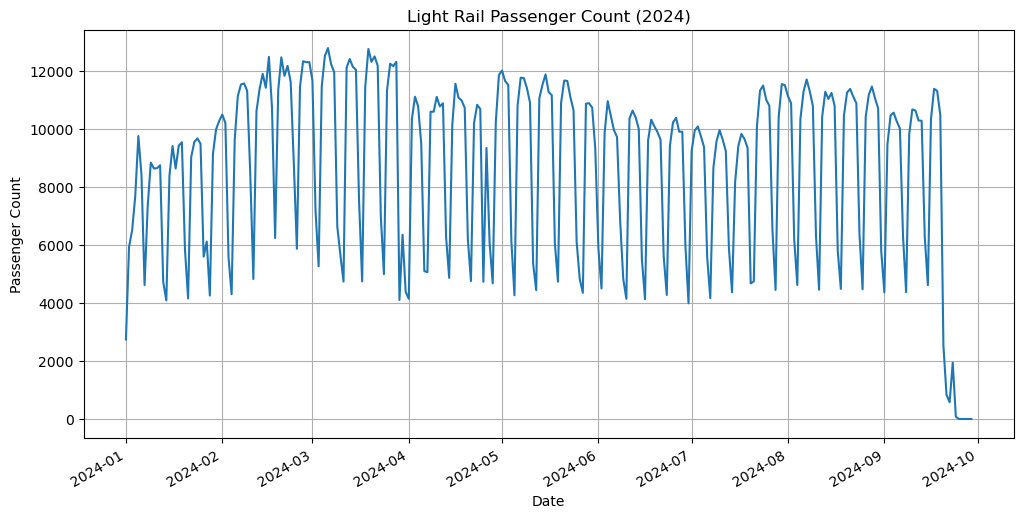

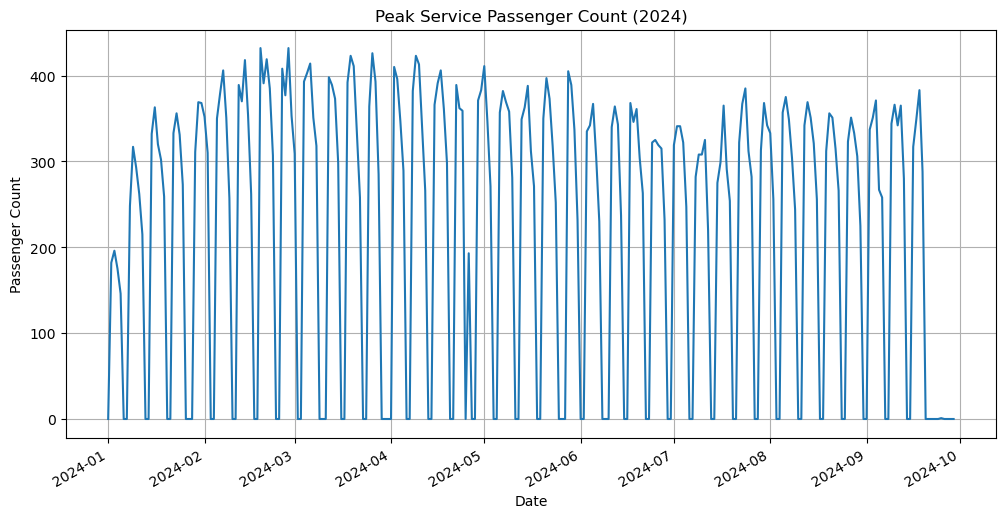

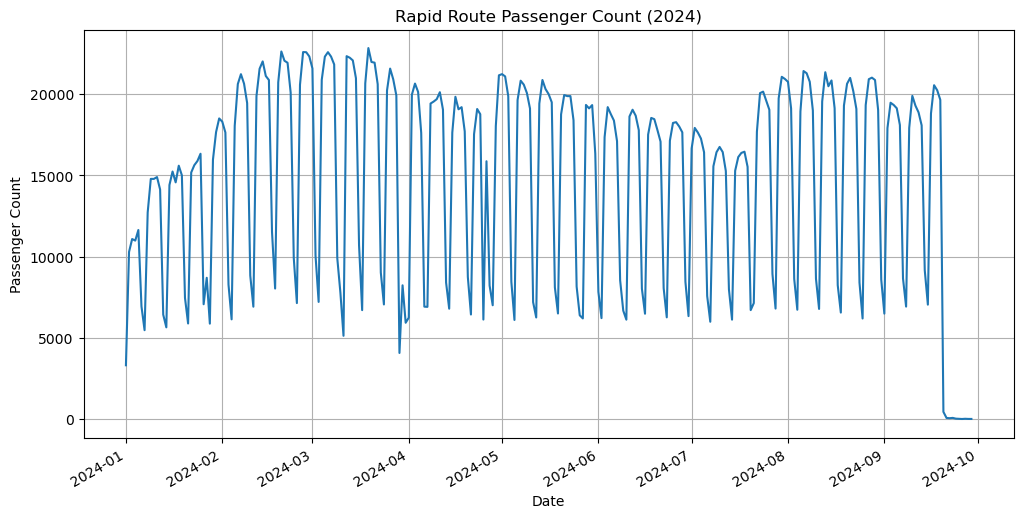

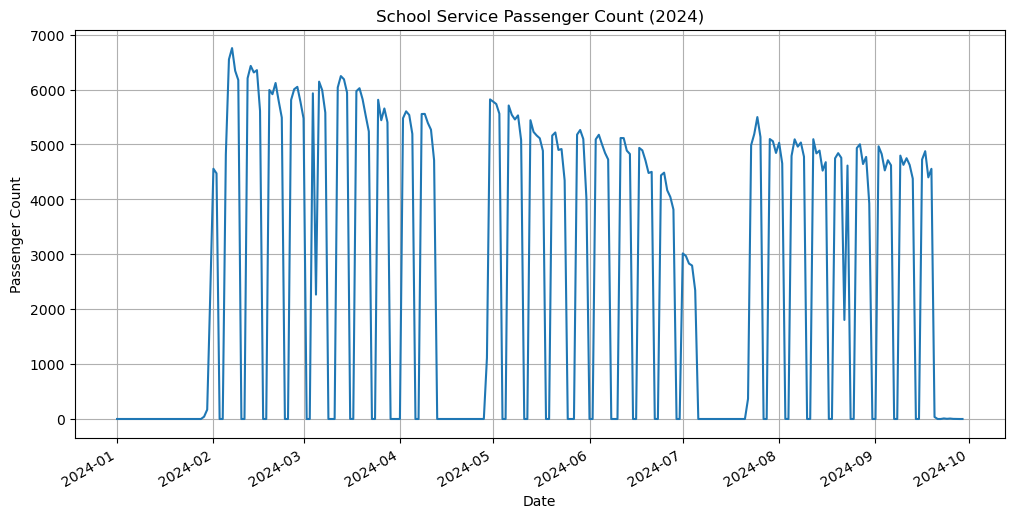

In [24]:
# Plot for Local Route
plt.figure(figsize=(12, 6))
df_2024.set_index('Date')['Local Route'].plot()
plt.title("Local Route Passenger Count (2024)")
plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot for Light Rail
plt.figure(figsize=(12, 6))
df_2024.set_index('Date')['Light Rail'].plot()
plt.title("Light Rail Passenger Count (2024)")
plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot for Peak Service
plt.figure(figsize=(12, 6))
df_2024.set_index('Date')['Peak Service'].plot()
plt.title("Peak Service Passenger Count (2024)")
plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot for Rapid Route
plt.figure(figsize=(12, 6))
df_2024.set_index('Date')['Rapid Route'].plot()
plt.title("Rapid Route Passenger Count (2024)")
plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot for School
plt.figure(figsize=(12, 6))
df_2024.set_index('Date')['School'].plot()
plt.title("School Service Passenger Count (2024)")
plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

df_2024 = df[df['Date'].dt.year == 2024]

df_2024.set_index('Date', inplace=True)


local_route_data = df_2024['Local Route']

train_size = int(len(local_route_data) * 0.8)
train, test = local_route_data[:train_size], local_route_data[train_size:]

model = ARIMA(train, order=(10, 1, 0)) 
model_fit = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


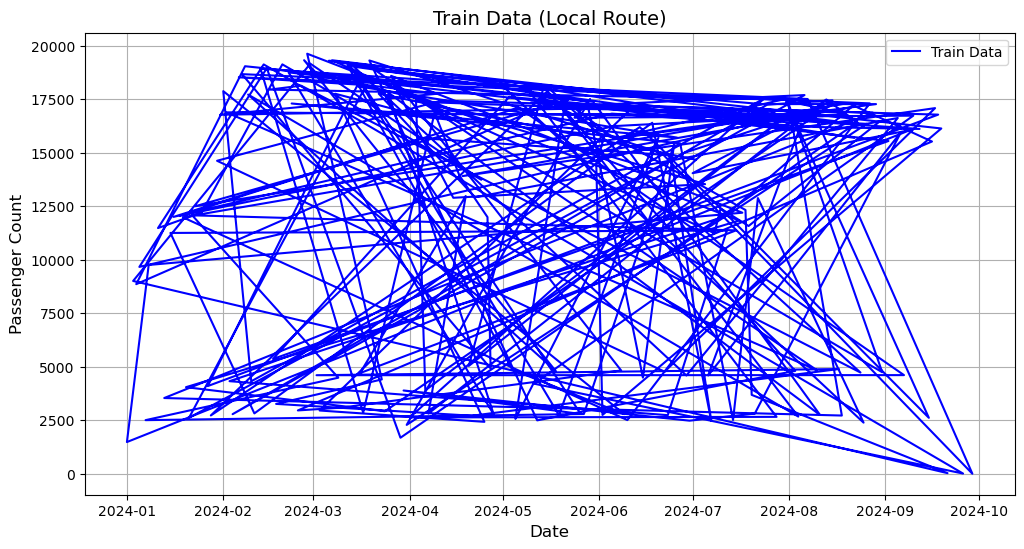

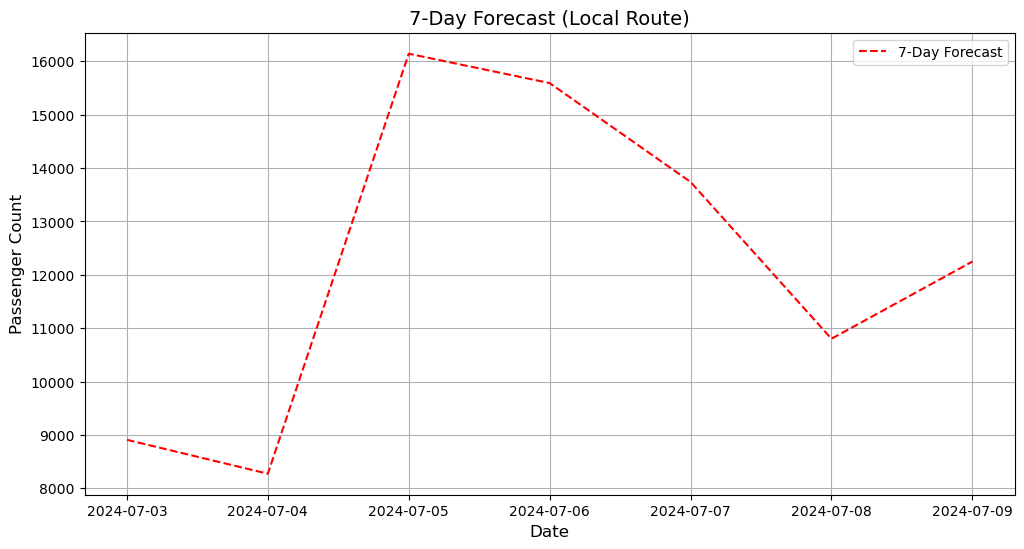

7-Day Forecast:
                Forecast
Date                    
2024-07-03   8909.525937
2024-07-04   8274.499828
2024-07-05  16141.060031
2024-07-06  15591.168829
2024-07-07  13739.012230
2024-07-08  10802.469541
2024-07-09  12248.510689


In [56]:
forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

last_date = train.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast
}).set_index('Date')

# Plot Train Data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.title('Train Data (Local Route)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], label='7-Day Forecast', color='red', linestyle='--')
plt.title('7-Day Forecast (Local Route)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

print("7-Day Forecast:")
print(forecast_df)


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

df_2024 = df[df['Date'].dt.year == 2024]

df_2024.set_index('Date', inplace=True)


local_route_data = df_2024['Light Rail']

train_size = int(len(local_route_data) * 0.8)
train, test = local_route_data[:train_size], local_route_data[train_size:]

model = ARIMA(train, order=(10, 1, 0)) 
model_fit = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


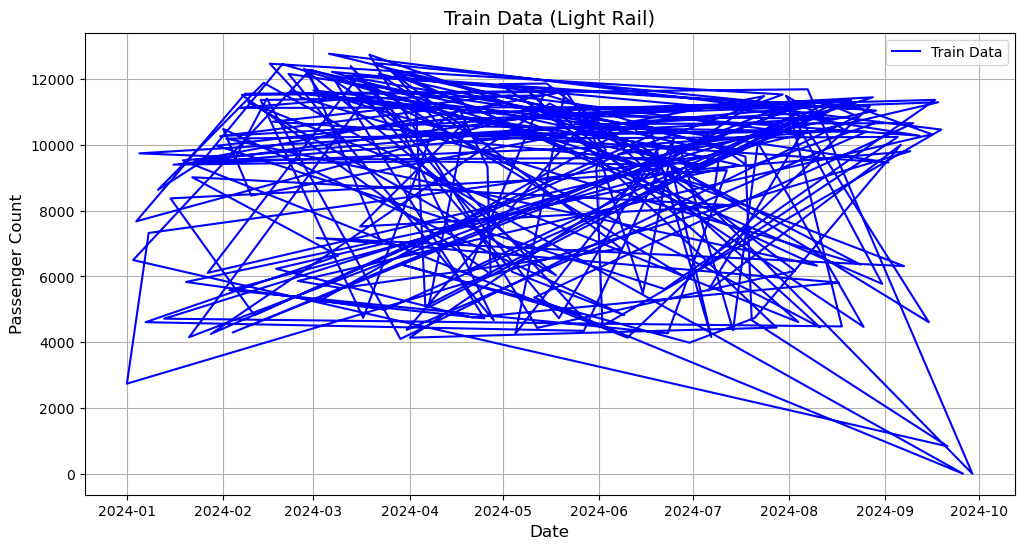

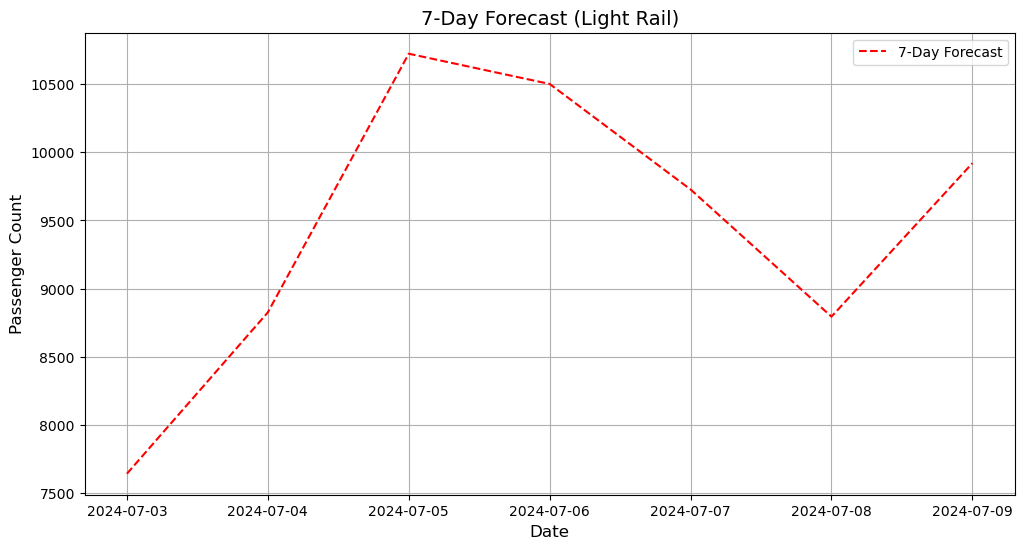

7-Day Forecast:
                Forecast
Date                    
2024-07-03   7641.692844
2024-07-04   8825.481729
2024-07-05  10723.671529
2024-07-06  10501.871331
2024-07-07   9727.720076
2024-07-08   8794.250442
2024-07-09   9920.356606


In [60]:
forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

last_date = train.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast
}).set_index('Date')

# Plot Train Data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.title('Train Data (Light Rail)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], label='7-Day Forecast', color='red', linestyle='--')
plt.title('7-Day Forecast (Light Rail)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

print("7-Day Forecast:")
print(forecast_df)


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


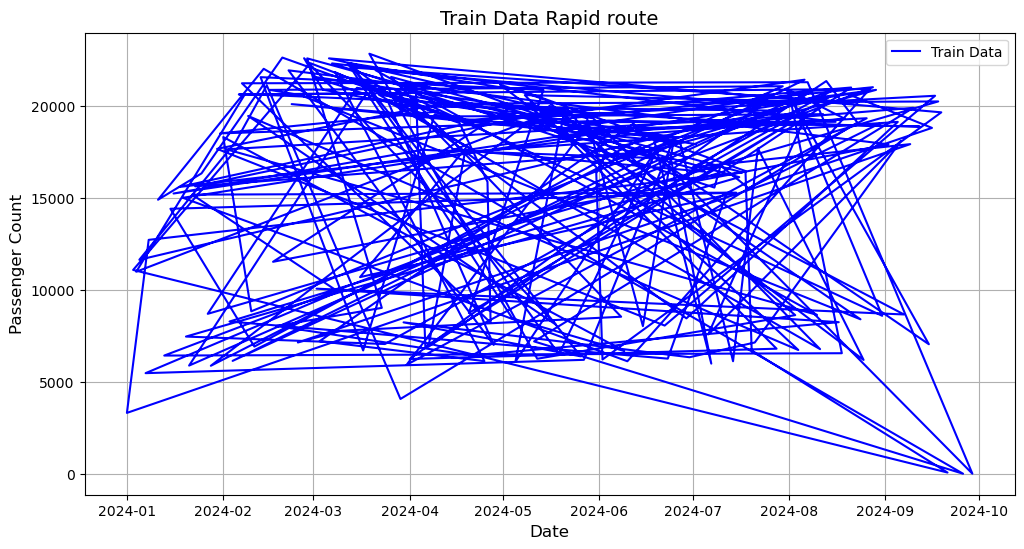

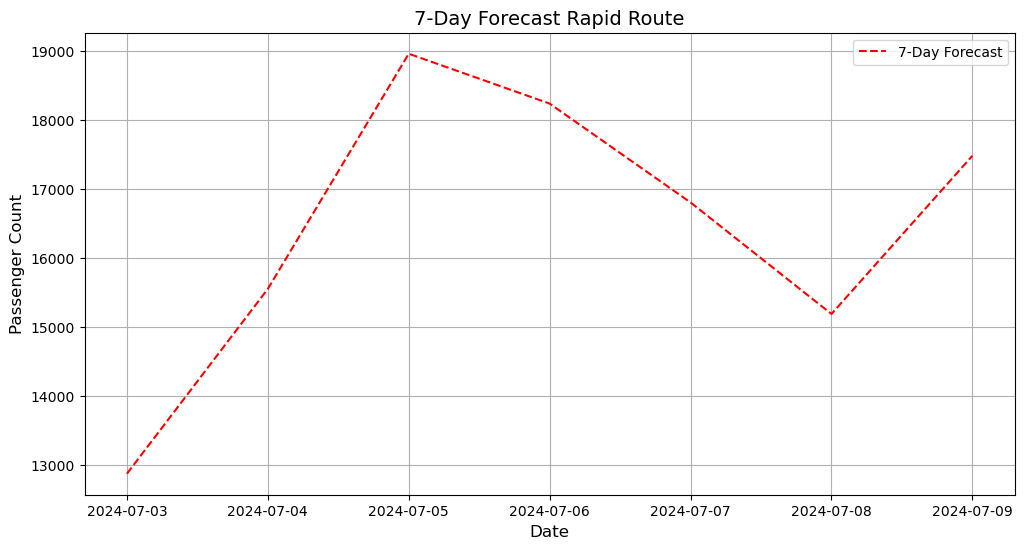

7-Day Forecast:
                Forecast
Date                    
2024-07-03  12871.747686
2024-07-04  15548.671760
2024-07-05  18955.089271
2024-07-06  18232.669887
2024-07-07  16800.879139
2024-07-08  15185.606996
2024-07-09  17476.693213


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

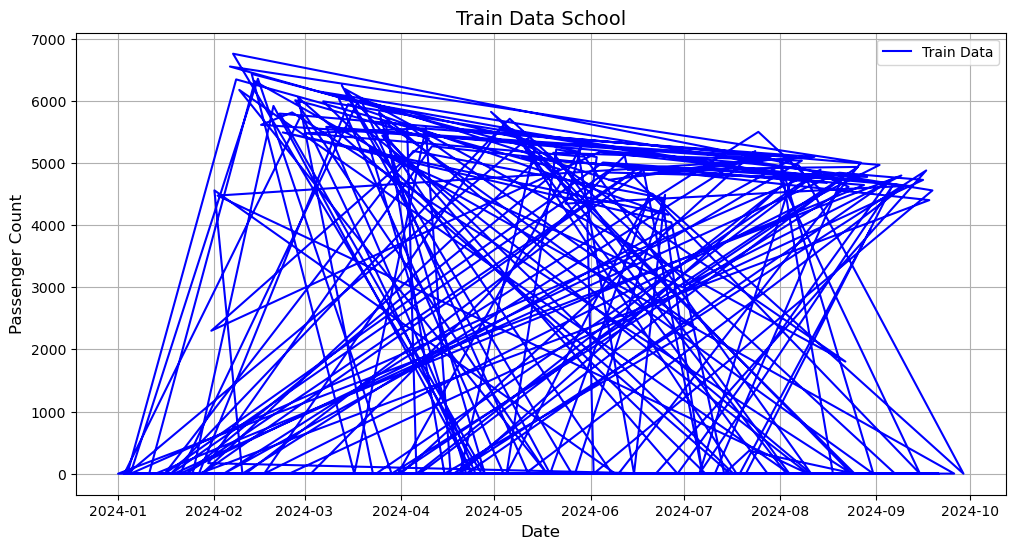

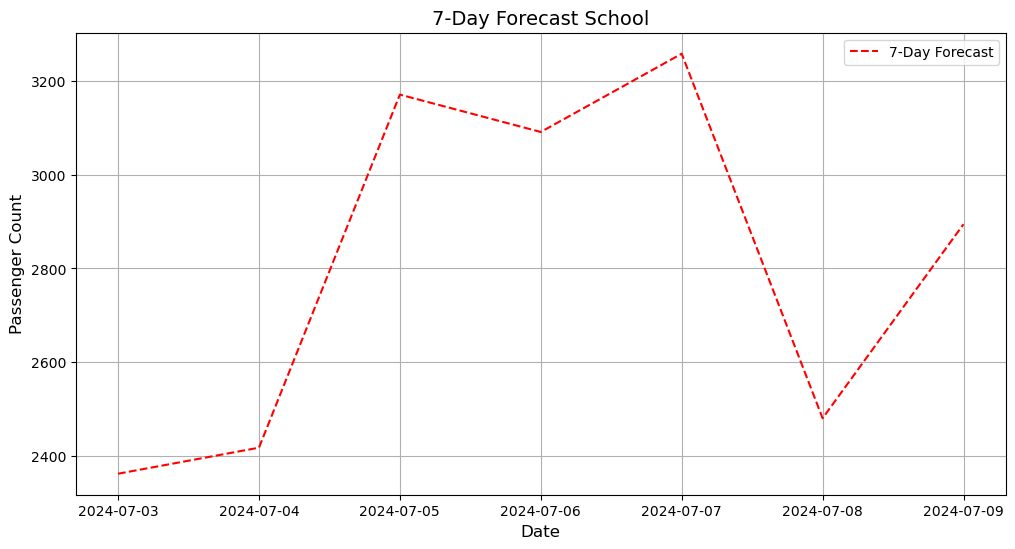

7-Day Forecast:
               Forecast
Date                   
2024-07-03  2362.386119
2024-07-04  2417.895834
2024-07-05  3170.718288
2024-07-06  3091.043222
2024-07-07  3257.889770
2024-07-08  2480.714848
2024-07-09  2894.435253


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

df_2024 = df[df['Date'].dt.year == 2024]

df_2024.set_index('Date', inplace=True)


local_route_data = df_2024['School']

train_size = int(len(local_route_data) * 0.8)
train, test = local_route_data[:train_size], local_route_data[train_size:]

model = ARIMA(train, order=(10, 1, 0)) 
model_fit = model.fit()

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

last_date = train.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast
}).set_index('Date')

# Plot Train Data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.title('Train Data School', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], label='7-Day Forecast', color='red', linestyle='--')
plt.title('7-Day Forecast School', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

print("7-Day Forecast:")
print(forecast_df)
